# Book recommendation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Books = pd.read_csv('Books.csv')
Ratings = pd.read_csv('Ratings.csv')
Users = pd.read_csv('Users.csv')

In [3]:
print(Books.shape)
print(Ratings.shape)
print(Users.shape)

(16790, 8)
(1149780, 3)
(278858, 3)


In [4]:
#Checking for missing values of Books

Books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    1
Publisher              1
Image-URL-S            1
Image-URL-M            1
Image-URL-L            1
dtype: int64

In [5]:
#Checking for missing values of Users and most likely we wont use age info

Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [6]:
Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [7]:
Users.duplicated().sum()
Ratings.duplicated().sum()
Books.duplicated().sum()

0

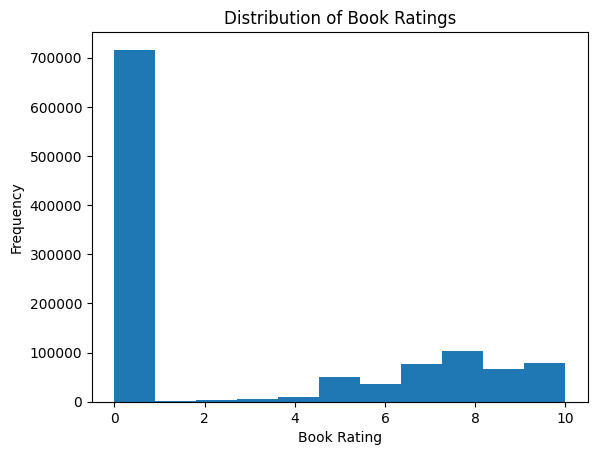

In [8]:
plt.hist(Ratings['Book-Rating'], bins=11)
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Book Ratings')
plt.show()

## Popularity based Recommendation System

In [9]:
Ratings_with_BookName = Ratings.merge(Books,on = 'ISBN')

In [10]:
Ratings_with_BookName

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
351631,216466,037312273X,0,To Marry McAllister (Bachelor Cousins) (Harle...,Carole Mortimer,2002.0,Harlequin,http://images.amazon.com/images/P/037312273X.0...,http://images.amazon.com/images/P/037312273X.0...,http://images.amazon.com/images/P/037312273X.0...
351632,274308,037312273X,0,To Marry McAllister (Bachelor Cousins) (Harle...,Carole Mortimer,2002.0,Harlequin,http://images.amazon.com/images/P/037312273X.0...,http://images.amazon.com/images/P/037312273X.0...,http://images.amazon.com/images/P/037312273X.0...
351633,178032,006008829X,8,Choices: Taking Control of Your Life and Makin...,Melody Beattie,2002.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008829X.0...,http://images.amazon.com/images/P/006008829X.0...,http://images.amazon.com/images/P/006008829X.0...
351634,270838,006008829X,10,Choices: Taking Control of Your Life and Makin...,Melody Beattie,2002.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008829X.0...,http://images.amazon.com/images/P/006008829X.0...,http://images.amazon.com/images/P/006008829X.0...


In [11]:
#Ratings_with_BookName["Book-Title"] = Ratings_with_BookName["Book-Title"].str.replace("[^a-zA-Z0-9]", " ", regex=True)

In [12]:
num_ratings_df= Ratings_with_BookName.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings_df.rename(columns={'Book-Rating':'Num-Rating'},inplace=True)
num_ratings_df

,Book-Title,Num-Rating
0,It Takes Two,2
1,Tales of Terror and Suspense,1
2,'48,4
3,'Salem's Lot,32
4,".Hack: //Legend of the Twilight, Vol. 1",5
...,...,...
15825,"metamorfosis, La (ClÃ¡sicos selecciÃ³n series)",3
15826,stardust,51
15827,Â¿QuiÃ©n se ha llevado mi queso?,2
15828,"Â¿QuÃ© me quieres, amor?",9


In [13]:
# Plotting a bar chart of the top 10 most-rated books
num_ratings_df = Ratings_with_BookName.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings_df.rename(columns={'Book-Rating':'Num-Rating'}, inplace=True)
num_ratings_df = num_ratings_df.sort_values('Num-Rating', ascending=False).head(50)
num_ratings_df


,Book-Title,Num-Rating
15452,Wild Animus,2502
12851,The Lovely Bones: A Novel,1295
11853,The Da Vinci Code,887
333,A Painted House,831
13062,The Nanny Diaries: A Novel,828
1762,Bridget Jones's Diary,812
3359,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
13421,The Red Tent (Bestselling Backlist),723
13607,The Secret Life of Bees,715
928,Angels &amp; Demons,656


In [14]:
Ratings_with_BookName['Book-Rating'] = Ratings_with_BookName['Book-Rating'].astype(float)
avg_ratings_df = Ratings_with_BookName.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_ratings_df.rename(columns={'Book-Rating':'Avg-Rating'},inplace=True)
avg_ratings_df

,Book-Title,Avg-Rating
0,It Takes Two,0.000000
1,Tales of Terror and Suspense,0.000000
2,'48,0.000000
3,'Salem's Lot,3.406250
4,".Hack: //Legend of the Twilight, Vol. 1",6.400000
...,...,...
15825,"metamorfosis, La (ClÃ¡sicos selecciÃ³n series)",6.000000
15826,stardust,4.137255
15827,Â¿QuiÃ©n se ha llevado mi queso?,7.500000
15828,"Â¿QuÃ© me quieres, amor?",3.000000


In [15]:
popular_df = num_ratings_df.merge(avg_ratings_df,on='Book-Title')
popular_df

,Book-Title,Num-Rating,Avg-Rating
0,Wild Animus,2502,1.019584
1,The Lovely Bones: A Novel,1295,4.468726
2,The Da Vinci Code,887,4.658399
3,A Painted House,831,3.220217
4,The Nanny Diaries: A Novel,828,3.530193
5,Bridget Jones's Diary,812,3.527094
6,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732,3.448087
7,The Red Tent (Bestselling Backlist),723,4.334716
8,The Secret Life of Bees,715,4.381818
9,Angels &amp; Demons,656,3.704268


In [16]:
# only keep books with at least 250 ratings
# sort by average rating in descending order
popular_df = popular_df[popular_df['Num-Rating']>=250].sort_values('Avg-Rating',ascending=False).head(50)
popular_df

,Book-Title,Num-Rating,Avg-Rating
22,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
18,Harry Potter and the Sorcerer's Stone (Harry P...,571,4.900175
37,To Kill a Mockingbird,488,4.704918
2,The Da Vinci Code,887,4.658399
1,The Lovely Bones: A Novel,1295,4.468726
8,The Secret Life of Bees,715,4.381818
35,"Tuesdays with Morrie: An Old Man, a Young Man,...",492,4.363821
7,The Red Tent (Bestselling Backlist),723,4.334716
27,Girl with a Pearl Earring,526,4.218631
15,Where the Heart Is (Oprah's Book Club (Paperba...,585,4.105983


In [17]:
popular_df = popular_df.merge(Books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Num-Rating','Avg-Rating']]
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'

/tmp/ipykernel_101883/1698454350.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(popular_df['Book-Title'][:10], popular_df['Num-Rating'][:10])


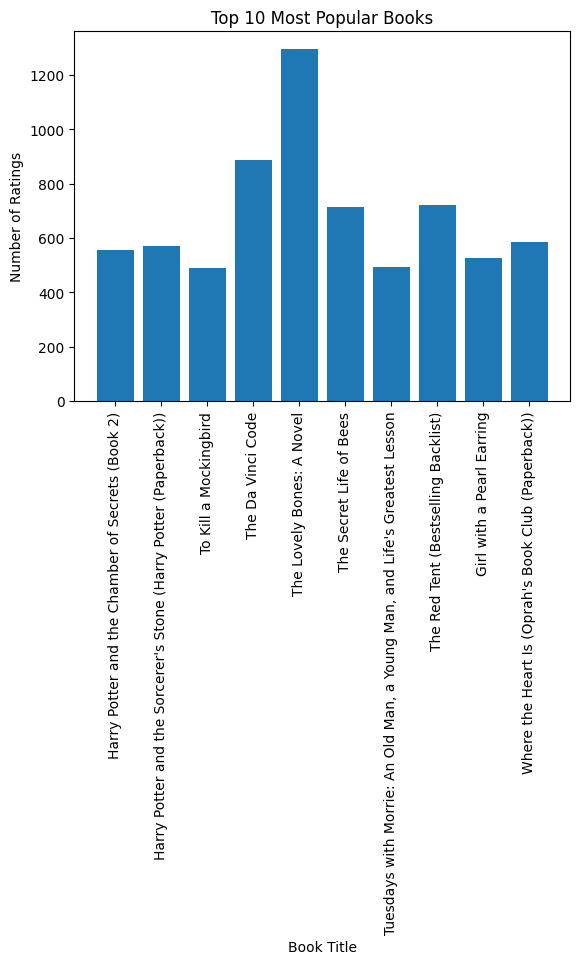

In [18]:
# create a bar chart for the top 10 most popular books
plt.bar(popular_df['Book-Title'][:10], popular_df['Num-Rating'][:10])
plt.xticks(rotation=90)
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Most Popular Books')
plt.show()


## Collabrative Based Recommendation System

In [19]:
x = Ratings_with_BookName.groupby('User-ID').count()['Book-Rating'] > 100
similar_users = x[x].index

In [20]:
filtered_rating = Ratings_with_BookName[Ratings_with_BookName['User-ID'].isin(similar_users)]

In [21]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 30
famous_books = y[y].index

In [22]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
pt = final_ratings.pivot_table(index='Book-Title',columns = 'User-ID',values='Book-Rating')
pt

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1st to Die: A Novel,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuthering Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
pt.fillna(0,inplace=True)

In [37]:
from sklearn.neighbors import NearestNeighbors

In [42]:
def find_k_nearest_neighbors(book_title, k=5):
    index = np.where(pt.index == book_title)[0][0]
    nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
    nn_model.fit(pt)

    distances, indices = nn_model.kneighbors([pt.iloc[index]], n_neighbors=k+1)
    similarity_scores = 1 - distances.flatten()[1:]
    
    return indices.flatten()[1:], similarity_scores

In [43]:
def recommend_as_knn(book_name, k=5):
    book_name = book_name.lower()
    matching_books = [title for title in pt.index if book_name in title.lower()]
    data = []

    for book_title in matching_books:
        similar_items, similarity_scores = find_k_nearest_neighbors(book_title, k)

        for i, score in zip(similar_items, similarity_scores):
            item = []
            temp_df = Books[Books['Book-Title'] == pt.index[i]]
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
            item.extend([author.lower() for author in list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values)])
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
            item.append(score)  # Append the similarity score

            data.append(item)

    return data

recommendations = recommend_as_knn("The Da Vinci Code", k=5)

for recommendation in recommendations:
    book_title = recommendation[0]
    book_author = recommendation[1]
    image_url = recommendation[2]
    similarity_score = recommendation[3]  # Access the similarity score

    print(f"Book: {book_title}")
    print(f"Author: {book_author}")
    print(f"Image URL: {image_url}")
    print(f"Similarity Score: {similarity_score}")
    print()


Book: Angels &amp; Demons
Author: dan brown
Image URL: http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg
Similarity Score: 0.27238205391358994

Book: TickTock
Author: dean r. koontz
Image URL: http://images.amazon.com/images/P/034538430X.01.MZZZZZZZ.jpg
Similarity Score: 0.26727686117734994

Book: Mutation
Author: robin cook
Image URL: http://images.amazon.com/images/P/0425119653.01.MZZZZZZZ.jpg
Similarity Score: 0.24483495299170266

Book: Saving Faith
Author: david baldacci
Image URL: http://images.amazon.com/images/P/0446608890.01.MZZZZZZZ.jpg
Similarity Score: 0.2440785566594571

Book: Misery
Author: stephen king
Image URL: http://images.amazon.com/images/P/0451153553.01.MZZZZZZZ.jpg
Similarity Score: 0.22759447882328154

